## DATASET CREATION

Unfortunately, the dataset I will work with does not come as one already done dataset - as it is mostly usual in Data Science projects. <br /> 
To get the sheer experience of how a normal Data Science job looks like I also wanted to dive into this issue. By experience I can tell that this takes a shit ton of time - like almost 80% - of preparing the data. <br /> 
Since the data usually shares the same countries and lists mostly the same years of the recording I used this as a primary key where I connect the datapoints with each other. <br /> 
However, the  countries are listed in rows along with the year of the recording - I want to have a final dataset that looks like follows: <br /> 

|Country | Afghanistan | Albania | ... | Zimbabwe | 
| ----- | ----------  | ------ | ----- | ------- | 
|Alcohol consumption [l] | 0.2 | 2.4 | ... | 0.01 |
|Human Develpment Index (HDI) | 0.1 | 0.15 | ... | 0.1 | 
|... | ... | ... | ... | ... |
|Healthcare Expenditure [$] | 13.322 | 15.211 | ... | 1.039 |

Thus, I have to transpose each of the countries and record each of the years as seperate entry in the dataset. <br /> 

All the data is [publicly available](https://ourworldindata.org), and this source is trusted by many notorious companies such as Vox, The Ney York times and even the top universities of this world like MIT, Oxford, Stanford. <br /> 
Hence, I assume that this data is rather based on actual recording from the respective country. <br /> 
Even the United Nation published their records in this page and I bet that these folks do some amazing work, which we can trust. <br />


But now let's not waste too much with the explaination part and go straight into how I merged the datafiles to one huge on. <br /> 

In [18]:
import os 
import sys
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
os.getcwd()

'C:\\Users\\Lenny\\Documents\\Studium_Robotics (M.Sc.)\\03_Semester 3 - Oslo ERASMUS\\01_Applied Data Analysis and Machine Learning\\Project 3'

In [6]:
datapath = os.path.join(os.path.join(os.getcwd(), 'data'), 'Health')

In [196]:
dataFileNames = [f for f in os.listdir(datapath) if os.path.isfile(os.path.join(datapath, f))]
type4Cols = []
type7Cols = []
manualLists = []
max_countries = 0
countries_list = []

for file in dataFileNames: 
    try:
        df = pd.read_csv(os.path.join(datapath, str(file) ) , encoding='latin-1')
    except: 
        print(file)
        manualLists.append(file)
    if df.shape[1] == 4: # one type of files (4 columns) 
        type4Cols.append(file) 
        countries = list(set(df["Entity"]))
        if len(countries) > max_countries: 
            max_countries = len(countries)
            countries_list = countries
    elif df.shape[1] == 7: 
        type7Cols.append(file) 
    else: # manual shit  to do then 
        manualLists.append(file)
print( max_countries, countries_list)

Water and Sanitation Services.csv
261 ['Greenland', 'Japan', 'Portugal', 'Small states', 'Ecuador', 'IDA & IBRD total', 'Bulgaria', 'Monaco', 'Mali', 'El Salvador', 'Egypt', 'Fragile and conflict affected situations', 'World', 'Congo', 'Kiribati', 'High income', 'Israel', 'Upper middle income', 'Spain', 'Myanmar', 'Colombia', 'Pre-demographic dividend', 'Isle of Man', 'Andorra', 'Guam', 'Marshall Islands', 'Cape Verde', 'Libya', 'Sweden', 'Yemen', 'Singapore', 'Croatia', 'Bosnia and Herzegovina', 'Early-demographic dividend', 'Gabon', 'Armenia', 'Democratic Republic of Congo', 'Denmark', 'Fiji', 'Qatar', 'Guinea-Bissau', 'Samoa', 'Cayman Islands', 'Sao Tome and Principe', 'Curacao', 'Malta', 'Turkmenistan', 'Costa Rica', 'OECD members', 'Austria', 'Saudi Arabia', 'South Africa', 'Sub-Saharan Africa (IDA & IBRD)', 'Germany', 'Hungary', 'Kosovo', 'Kuwait', 'Estonia', 'Other small states', 'Indonesia', 'Central Europe and the Baltics', 'Netherlands', 'Uzbekistan', 'Equatorial Guinea', 'Br

In [26]:
df.head(10)

,Entity,Code,Year,Wine Consumption
0,Afghanistan,AFG,1961,0.0
1,Afghanistan,AFG,1962,0.0
2,Afghanistan,AFG,1963,0.0
3,Afghanistan,AFG,1964,0.0
4,Afghanistan,AFG,1965,0.0
5,Afghanistan,AFG,1966,0.0
6,Afghanistan,AFG,1967,0.0
7,Afghanistan,AFG,1968,0.0
8,Afghanistan,AFG,1969,0.0
9,Afghanistan,AFG,1970,0.0


In [112]:
countries = list(set(df["Entity"]))
years = list(set(df['Year']))
columns = list(df.columns)
countries.index("Germany")

37

In [208]:
final_df = pd.DataFrame(data = np.zeros( (10000000, max_countries) ),
                        index = np.arange(10000000),
                        columns = [ country for country in countries_list])
# save indices as strings to get meaningful names
final_df.index = final_df.index.map(str)
final_df.shape

(10000000, 261)

In [207]:
b = df[df['Entity'] == 'France']
c = b[b['Year'] == 1999]#[columns[-1]]
d = b[b['Year'] == 1999][columns[-1]].sum()

#df.groupby(["Entity", 'Year']).describe()

In [212]:
type4Cols[-1]

'wine-consumption-per-person.csv'

In [ ]:
try: 
    for lists in type4Cols:
        if lists == 'Water and Sanitation Services.csv': # skip this guy since it causes troubles
            lists = type4Cols[-1] # last list element
        ## Read the file and get the all countries along with their reported years
        print("{} list out of {}".format(type4Cols.index(lists), len(type4Cols)))
        df = pd.read_csv(os.path.join(datapath, str(lists) ) , encoding='latin-1')
        columns = list(df.columns)
        countries = list(set(df["Entity"]))
        years = list(set(df['Year']))
        
        # get a list of all the column names 
        indexNamesArr = final_df.index.values
        nextListIndex = 0

        ## groupby countries and then years accordingly
        #df.groupby(["Entity", 'Year'])

        firstListRun = False # flag for renaming the indices

        for country in countries: 
            country_df = df[df['Entity'] == country]
            i = nextListIndex

            for year in years:
                
                # rename the indices only once
                if not firstListRun:
                    indexName = str(columns[-1]) + ' in ' + str(year)
                    indexNamesArr[i] = indexName

                ## get the proper values and fill empty ones with the average
                value = country_df[country_df["Year"] == year][columns[-1]].sum() if not country_df[country_df["Year"] == year][columns[-1]].empty else country_df[columns[-1]].mean()
                final_df.iat[i, countries.index(country)] = value # .iat[row, col]
                i = i + 1

            ## get the proper index for the next list to begin with
            nextListIndex = i + 1 # need to add one otherwise it would overwrite the last entry from previous list    
            firstListRun = True
            
except Exception as e: 
    print("Next List Index in line: {} of {}, Matrix Size: {}, list: {}".format(i, nextListIndex, final_df.shape[0], lists))
    print(e)
    sys.exit()

final_df

0 list out of 36
1 list out of 36
2 list out of 36
3 list out of 36
4 list out of 36
5 list out of 36
6 list out of 36
7 list out of 36
8 list out of 36
9 list out of 36
10 list out of 36
11 list out of 36
12 list out of 36
13 list out of 36
14 list out of 36
15 list out of 36
16 list out of 36
17 list out of 36
18 list out of 36
19 list out of 36
20 list out of 36
21 list out of 36
22 list out of 36
23 list out of 36
24 list out of 36
25 list out of 36
26 list out of 36
27 list out of 36
28 list out of 36
29 list out of 36
30 list out of 36
31 list out of 36
32 list out of 36
33 list out of 36
35 list out of 36
35 list out of 36


In [210]:
final_df.head()

,Greenland,Japan,Portugal,Small states,Ecuador,IDA & IBRD total,Bulgaria,Monaco,Mali,El Salvador,...,Finland,Rwanda,Middle East & North Africa (IDA & IBRD),Senegal,Uganda,United Arab Emirates,Sri Lanka,Trinidad and Tobago,Belgium,Laos
Food Balance Sheets: Vegetables - Food supply quantity (kg/capita/yr) (FAO (2017)) (kg) in 1961,96.79,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Food Balance Sheets: Vegetables - Food supply quantity (kg/capita/yr) (FAO (2017)) (kg) in 1962,108.07,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Food Balance Sheets: Vegetables - Food supply quantity (kg/capita/yr) (FAO (2017)) (kg) in 1963,119.47,12.3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Food Balance Sheets: Vegetables - Food supply quantity (kg/capita/yr) (FAO (2017)) (kg) in 1964,114.02,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Food Balance Sheets: Vegetables - Food supply quantity (kg/capita/yr) (FAO (2017)) (kg) in 1965,119.56,0.0,5.859308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
final_df.to_csv(os.path.join(datapath, "Merged UN Data.csv"))

In [35]:
df.groupby('Entity')['Wine Consumption'].sum().sort_values().tail(5)

Entity
Luxembourg    394.19
Argentina     522.36
Italy         559.67
Portugal      588.63
France        620.45
Name: Wine Consumption, dtype: float64

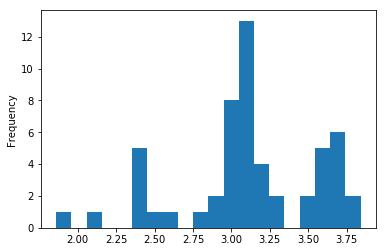

In [28]:
df[df['Entity'] == 'Germany']['Wine Consumption'].plot.hist(bins=20)